In [1]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'

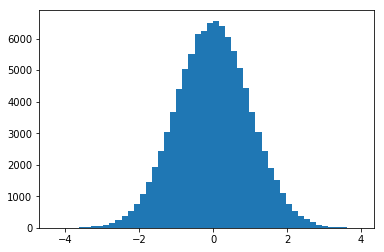

In [2]:
plt.hist(np.random.normal(loc=0, scale=1, size=100000), bins=50);

# Monte Carlo sampling

In [96]:
def proposal_dist(mu, sigma):
    theta_drafted = np.random.normal(loc=mu, scale=sigma, size=1)[0]
    return theta_drafted
proposal_dist(0,3)

9.091546862479461

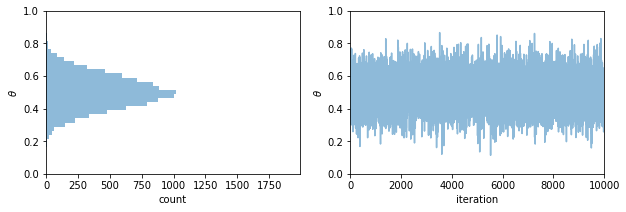

In [97]:
# sampling from Gaussian with fixed parameters: mu=0.5, sigma=0.1
idx = []
theta = []
mu, sigma = 0.5, 0.1
idx_max = 10000
for i in range(idx_max):
    idx.append(i)
#     theta_i = np.random.normal(loc=mu, scale=sigma, size=1)[0]
    theta_i = proposal_dist(mu, sigma)
    theta.append(theta_i)
    
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10, 3)
ax[0].hist(theta, bins=30, orientation='horizontal', alpha=0.5)
ax[0].set_xlabel('count')
ax[0].set_ylabel('$\\theta$')
ax[0].set_xlim([0, idx_max/5-10])
ax[0].set_ylim([0, 1]);

ax[1].plot(idx, theta, '-', alpha=0.5)
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('$\\theta$')
ax[1].set_xlim([0, idx_max])
ax[1].set_ylim([0, 1]);

# Markov Chain Monte Carlo sampling

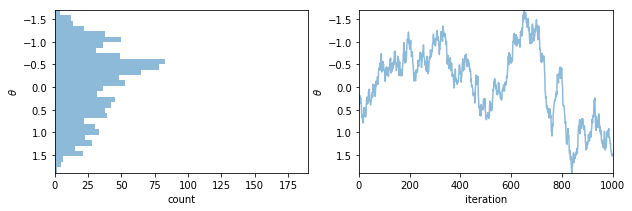

In [99]:
# MC sampling from Gaussian: mu[i]=theta[i-1], sigma=0.1
mu, sigma = 0.5, 0.1
idx_max = 1000
idx = [0]
theta = [mu]
for i in range(1, idx_max):
    idx.append(i)
    mu_i = theta[i-1]
#     theta_i = np.random.normal(loc=mu_i, scale=sigma, size=1)[0]
    theta_i = proposal_dist(mu_i, sigma)
    theta.append(theta_i)
    
ymin, ymax = max([1, max(theta)]), min([-1, min(theta)])
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10, 3)
ax[0].hist(theta, bins=30, orientation='horizontal', alpha=0.5)
ax[0].set_xlabel('count')
ax[0].set_ylabel('$\\theta$')
ax[0].set_xlim([0, idx_max/5-10])
ax[0].set_ylim([ymin, ymax]);

ax[1].plot(idx, theta, '-', alpha=0.5)
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('$\\theta$')
ax[1].set_xlim([0, idx_max])
ax[1].set_ylim([ymin, ymax]);

# Metropolis-Hastings algorithm

In [73]:
from scipy.stats import beta, binom

def prior(theta, a, b):
    return beta.pdf(theta, a, b)

def likelihood(theta, n, k):
    # binomial
    return binom.pmf(k, n, theta)

def posterior(theta, a, b, n, k):
    norm = 1/1
    return norm * prior(theta, a, b) * likelihood(theta, n, k)

In [82]:
def r(theta, theta_last):
    a, b, n, k = 30, 30, 10, 4
    return posterior(theta, a, b, n, k) / posterior(theta_last, a, b, n, k)

def prob_acceptance(theta, theta_last):
    # accept r < 1
    return min([1, r(theta, theta_last)])

In [ ]:
from random import random

In [ ]:
def mh_sampling(theta, theta_last):
    prob_accept = prob_acceptance(theta, theta_last)    
    u = random()
    if u < prob_accept:
        theta_new = theta  # accept new value
    else:
        theta_new = theta_last  # keep last value

In [ ]:
# MCMC
mu, sigma = 0.5, 0.1
idx_max = 1000
idx = [0]
theta = [mu]
for i in range(1, idx_max):
    idx.append(i)
    mu_i = theta[i-1]
    theta_i = np.random.normal(loc=mu_i, scale=sigma, size=1)[0]
    theta.append(theta_i)
   